<a href="https://colab.research.google.com/github/NayibGS07/Diplomado_Ciencia_de_Datos/blob/main/Diplomado_Ciencia_de_Datos_2024/Ciencia_de_Datos_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIPLOMADO CIENCIA MATEMÁTICA DE DATOS

## MODULO: CLUSTERING

## Libraries

In [56]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

## Data Loading

In [57]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Exploratory Analysis

In [58]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [59]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [60]:
species_count = iris['species'].value_counts().reset_index()
species_count.columns = ['Species', 'Count']
fig = px.bar(species_count, x='Species', y='Count', color='Species', title='Distribution of Species', template = 'plotly_white', text = 'Count')
fig.show()

In [61]:
fig = go.Figure()
for feature in iris.columns[:-1]:
    fig.add_trace(go.Box(y=iris[feature], x=iris['species'], name=feature))
fig.update_layout(title='Boxplot of Features Across Species', xaxis_title='Species', yaxis_title='Value', template = 'plotly_white')
fig.show()

In [62]:
fig = px.scatter_matrix(iris, dimensions=iris.columns[:-1], color='species', template = 'plotly_white')
fig.update_traces(diagonal_visible=False)
fig.update_layout(title='Pairplot of Iris Dataset')
fig.show()

In [63]:
corr_matrix = iris.drop('species', axis=1).corr()
fig = px.imshow(corr_matrix, x = corr_matrix.columns, y = corr_matrix.columns, color_continuous_scale = 'RdBu',  range_color=[-1,1], text_auto = True, aspect = "auto")
fig.update_layout(title='Correlation Heatmap')
fig.update(layout_coloraxis_showscale=False)
fig.show()

## Clustering Models

In [64]:
X = iris.drop('species', axis=1)

### K-Means Clustering

K-Means clustering aims to partition a dataset into K clusters based on similarity. It works iteratively to assign data points to the nearest cluster centroid and update the centroids based on the mean of the assigned points.

The algorithm converges when the centroids no longer change significantly or after a specified number of iterations.

The objective function of K-Means is to minimize the within-cluster sum of squares (WCSS), which measures the squared distance between each point and its cluster centroid.

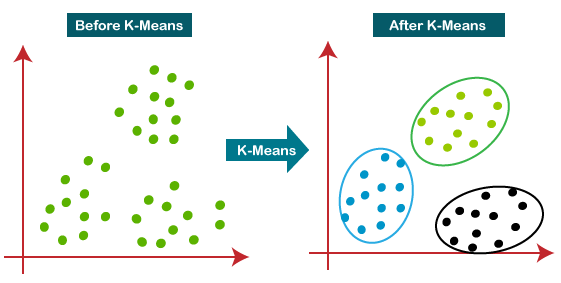

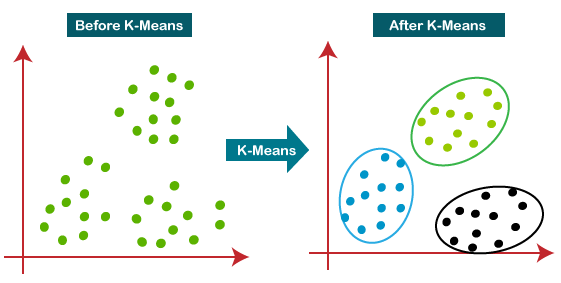

* Pros:
 *  Simple and easy to implement.
 * Scales well to large datasets.

* Cons:
 * Requires specifying the number of clusters (K) in advance.
 * Sensitive to initial cluster centroids, which can lead to suboptimal solutions.

#### Elbow Method

The Elbow Method is a heuristic technique that helps determine the optimal number of clusters by evaluating the within-cluster sum of squares (WCSS) for different values of K.

The within-cluster sum of squares is a measure of the variability of the observations within each cluster. In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares.

It plots the WCSS against the number of clusters and looks for an "elbow" point, where the rate of decrease in WCSS slows down significantly.

In [65]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

wcss

[681.3706,
 152.3479517603579,
 78.851441426146,
 57.22847321428572,
 46.446182051282065,
 39.03998724608726,
 34.46949589883801,
 30.1865551948052,
 28.28937085137085,
 26.552373141564317]

In [66]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines+markers', name='WCSS'))
fig.update_layout(title='Elbow Method for Optimal K',
                  xaxis_title='Number of Clusters (K)',
                  yaxis_title='WCSS',
                  xaxis=dict(tickmode='linear', tickvals=list(range(1, 11))),
                  yaxis=dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In the Elbow Method plot, we look for the point where the decrease in WCSS starts to slow down significantly, forming an "elbow" shape.

This point indicates the optimal number of clusters, as adding more clusters beyond this point may not significantly reduce WCSS.

#### Silhouette Score

The Silhouette Score is a metric that measures the quality of clustering by assessing the compactness of clusters and the separation between clusters.

It ranges from -1 to 1, where a higher score indicates better clustering, with values closer to 1 indicating dense, well-separated clusters.

In [67]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, cluster_labels))
silhouette_scores

[0.6810461692117465,
 0.5528190123564102,
 0.49805050499728815,
 0.48874888709310654,
 0.36483400396700366,
 0.34974816211612186,
 0.3574536925852728,
 0.33944886363937105,
 0.297314497218599]

In [68]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = list(range(2, 11)), y = silhouette_scores, mode = 'lines+markers', name = 'Silhouette Score'))
fig.update_layout(title = 'Silhouette Score for Optimal K',
                  xaxis_title = 'Number of Clusters (K)',
                  yaxis_title = 'Silhouette Score',
                  xaxis = dict(tickmode='linear', tickvals=list(range(2, 11))),
                  yaxis = dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In the Silhouette Score plot, we look for the highest score, indicating the optimal number of clusters.

Higher Silhouette scores suggest well-separated clusters, while lower scores suggest overlapping or poorly separated clusters.

In [69]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [70]:
iris_c3 = iris.copy()
iris_c3['cluster'] = kmeans.labels_
iris_c3['cluster'] = iris_c3.cluster.astype(str)
fig = px.scatter(iris_c3, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_white', title = 'Cluster - 3')
fig.show()

In [71]:
iris_comp = iris.copy()
iris_comp['cluster'] = pd.Series(kmeans.labels_).replace([0, 1, 2], ['versicolor', 'setosa', 'virginica'])
iris_comp['comp'] = iris_comp.species == iris_comp.cluster
iris_comp

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,comp
0,5.1,3.5,1.4,0.2,setosa,setosa,True
1,4.9,3.0,1.4,0.2,setosa,setosa,True
2,4.7,3.2,1.3,0.2,setosa,setosa,True
3,4.6,3.1,1.5,0.2,setosa,setosa,True
4,5.0,3.6,1.4,0.2,setosa,setosa,True
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,virginica,True
146,6.3,2.5,5.0,1.9,virginica,versicolor,False
147,6.5,3.0,5.2,2.0,virginica,virginica,True
148,6.2,3.4,5.4,2.3,virginica,virginica,True


In [72]:
fig = px.scatter(iris_comp, x = 'sepal_length', y = 'petal_length', color = 'species', template = 'plotly_white', symbol = 'comp', title = 'Cluster - 3 (Comp)')
fig.show()

In [73]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 10)
kmeans.fit(X)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [74]:
iris_c2 = iris.copy()
iris_c2['cluster'] = kmeans.labels_
iris_c2['cluster'] = iris_c2.cluster.astype(str)
fig = px.scatter(iris_c2, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_white', title = 'Cluster - 2')
fig.show()

### Hierarchical Clustering

https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

Hierarchical clustering creates a tree-like hierarchy of clusters, also known as a dendrogram. It can be agglomerative (bottom-up) or divisive (top-down).

Agglomerative hierarchical clustering starts with each data point as a separate cluster and then merges the closest clusters iteratively until only one cluster remains.

The linkage method in hierarchical clustering defines how the distance between clusters is calculated. Common linkage methods include:

* Single linkage: Distance between two closest points in different clusters.
* Complete linkage: Distance between two farthest points in different clusters.
* Average linkage: Average distance between all points in different clusters.

The choice of linkage method impacts the shape and structure of the resulting dendrogram.

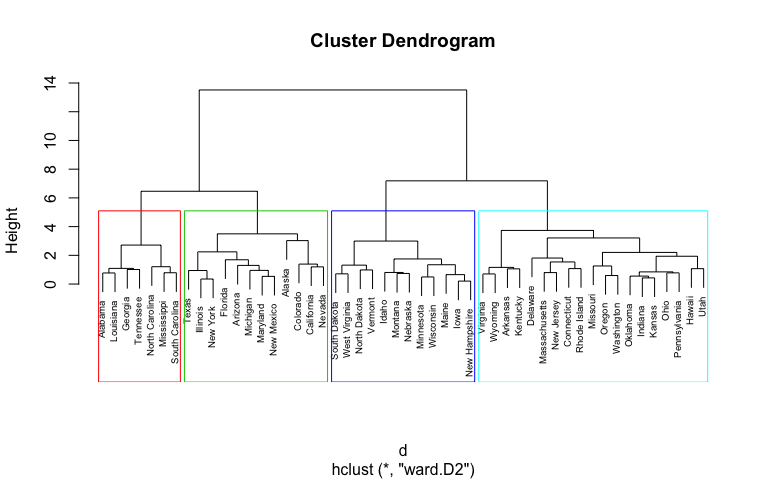


* Pros:
 * Does not require specifying the number of clusters in advance.
 * Provides a visual representation of cluster relationships through dendrograms.
* Cons:
 * Computationally intensive for large datasets.
 * Can be sensitive to noise and outliers.

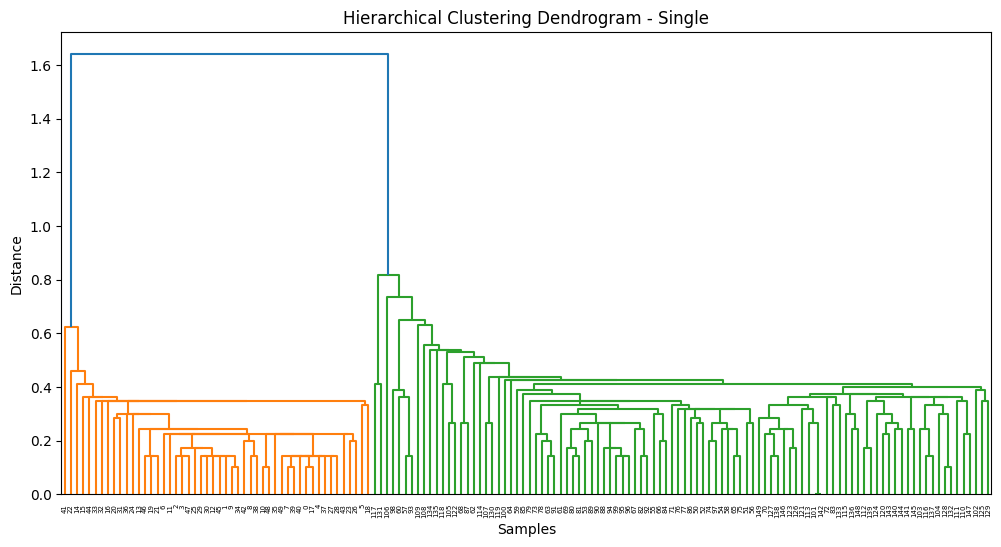

In [75]:
Z_s = linkage(X, 'single')

plt.figure(figsize=(12, 6))
dendrogram(Z_s)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram - Single')
plt.show()

In [76]:
iris_hcs = iris.copy()
max_d = 1
clusters = fcluster(Z_s, max_d, criterion='distance')
iris_hcs['cluster'] = clusters
iris_hcs['cluster'] = iris_hcs.cluster.astype(str)
fig = px.scatter(iris_hcs, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_white', title = 'Hierarchical Clustering - Simple')
fig.show()

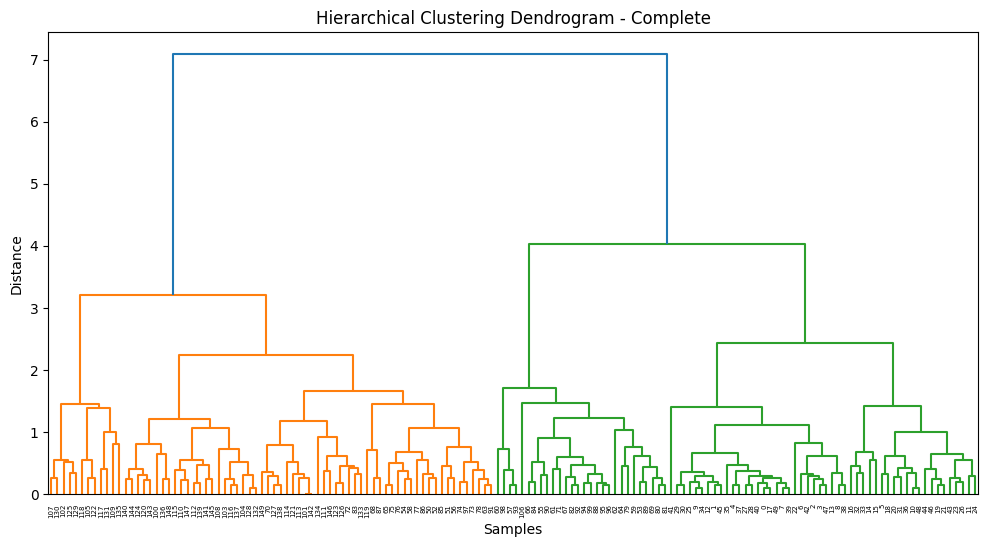

In [77]:
Z_c = linkage(X, 'complete')

plt.figure(figsize=(12, 6))
dendrogram(Z_c)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram - Complete')
plt.show()

In [78]:
iris_hcc = iris.copy()
max_d = 5
clusters = fcluster(Z_c, max_d, criterion='distance')
iris_hcc['cluster'] = clusters
iris_hcc['cluster'] = iris_hcc.cluster.astype(str)
fig = px.scatter(iris_hcc, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_white', title = 'Hierarchical Clustering - Complete')
fig.show()

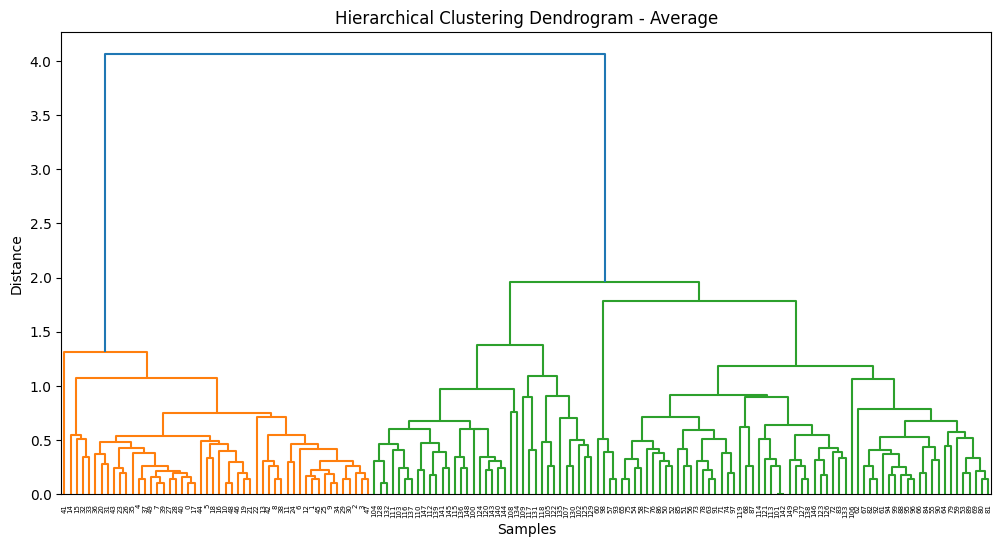

In [79]:
Z_a = linkage(X, 'average')

plt.figure(figsize=(12, 6))
dendrogram(Z_a)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram - Average')
plt.show()

In [80]:
iris_hca = iris.copy()
max_d = 2
clusters = fcluster(Z_a, max_d, criterion='distance')
iris_hca['cluster'] = clusters
iris_hca['cluster'] = iris_hca.cluster.astype(str)
fig = px.scatter(iris_hca, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_white', title = 'Hierarchical Clustering - Average')
fig.show()

### DBSCAN Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that groups together points that are closely packed, based on density.

It defines clusters as dense regions separated by low-density areas.

DBSCAN requires two parameters: epsilon (eps), which defines the radius within which points are considered neighbors, and min_samples, the minimum number of points required to form a dense region (cluster).

Points are classified as core points, border points, or noise points based on their neighborhood density.

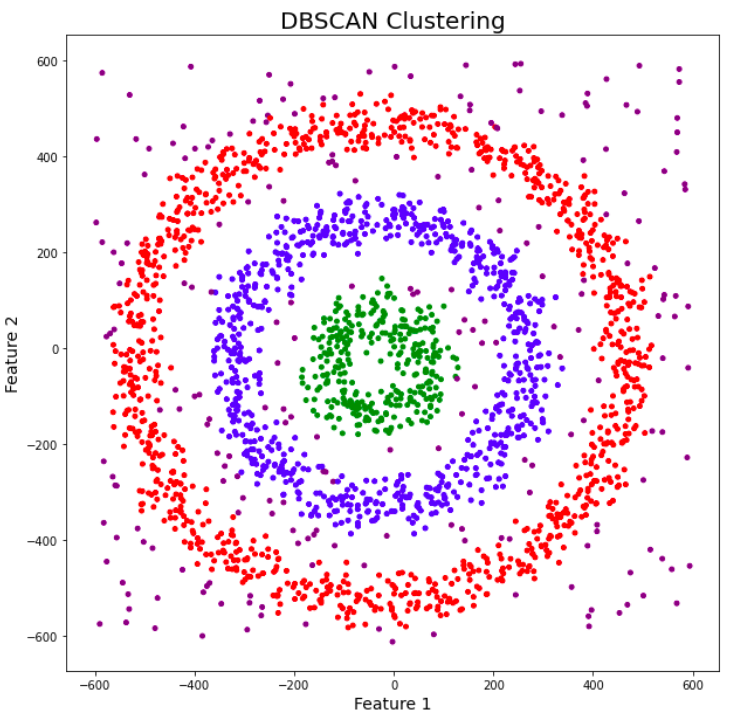

* Pros:
 * Can identify clusters of arbitrary shapes and handle noise well.
 * Does not require specifying the number of clusters in advance.
* Cons:
 * Sensitivity to parameter tuning, especially for epsilon and min_samples.
 * Computationally intensive for large datasets with varying densities.

In [81]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X)

In [82]:
iris_dbs = iris.copy()
iris_dbs['cluster'] = clusters
iris_dbs['cluster'] = iris_dbs.cluster.astype(str)
fig = px.scatter(iris_dbs, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_white', title = 'DBSCAN Clustering')
fig.show()

In [83]:
dbscan = DBSCAN(eps=1, min_samples=5)
clusters = dbscan.fit_predict(X)

iris_dbs = iris.copy()
iris_dbs['cluster'] = clusters
iris_dbs['cluster'] = iris_dbs.cluster.astype(str)
fig = px.scatter(iris_dbs, x = 'sepal_length', y = 'petal_length', color = 'cluster', template = 'plotly_white', title = 'DBSCAN Clustering')
fig.show()

### Principal Component Analysis (PCA)

PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining most of the variance in the data.

It achieves this by finding the orthogonal axes (principal components) along which the data has the highest variance.

PCA computes the eigenvectors and eigenvalues of the covariance matrix of the data.

The eigenvectors represent the principal components, and the eigenvalues indicate the amount of variance explained by each component.

The transformed data is obtained by projecting the original data onto the selected principal components.

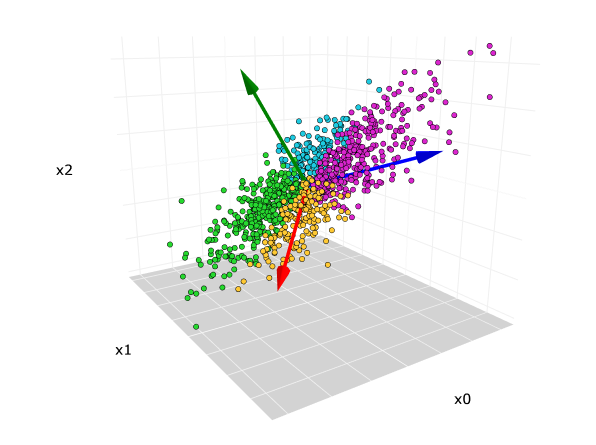

* Pros:
 * Reduces dimensionality while preserving most of the information.
 * Helps visualize high-dimensional data and identify important features.
* Cons:
 * Assumes linear relationships between variables.
 * May lose some information, especially if lower-dimensional space is too restrictive.

#### PCA - 2

In [84]:
pca = PCA(n_components=2)
X_pca2 = pca.fit_transform(X)
X_pca2

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

**Components**

Components in PCA represent the directions or axes in the original feature space that are transformed to create the principal components.

Each component is a linear combination of the original features, and they are orthogonal to each other (uncorrelated).

The components are represented by the eigenvectors of the covariance matrix.

In [85]:
components = pca.components_
components

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

**Explained Variance**

The explained variance represents the amount of variance explained by each principal component. It is obtained from the eigenvalues of the covariance matrix.

In PCA, the explained variance indicates how much information each principal component carries. Higher values mean more important components.

In [86]:
explained_variance = pca.explained_variance_
explained_variance

array([4.22824171, 0.24267075])

**Explained Variance Ratio**

The explained variance ratio is the proportion of variance explained by each principal component relative to the total variance in the data.
It is calculated by dividing the explained variance of each component by the sum of all explained variances.

The explained variance ratio gives insight into the relative importance of each component in capturing the data's variability.

In [87]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.92461872, 0.05306648])

In [88]:
iris_pca2 = iris.copy()
iris_pca2['PCA1'] = X_pca2[:, 0]
iris_pca2['PCA2'] = X_pca2[:, 1]

fig = px.scatter(iris_pca2, x='PCA1', y='PCA2', color='species', title='PCA of Iris Dataset', template = 'plotly_white')
fig.update_layout(xaxis_title='Principal Component 1', yaxis_title='Principal Component 2')

fig.show()

In [89]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(X_pca2)
    wcss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines+markers', name='WCSS'))
fig.update_layout(title='Elbow Method for Optimal K',
                  xaxis_title='Number of Clusters (K)',
                  yaxis_title='WCSS',
                  xaxis=dict(tickmode='linear', tickvals=list(range(1, 11))),
                  yaxis=dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In [90]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    cluster_labels = kmeans.fit_predict(X_pca2)
    silhouette_scores.append(silhouette_score(X_pca2, cluster_labels))

fig = go.Figure()
fig.add_trace(go.Scatter(x = list(range(2, 11)), y = silhouette_scores, mode = 'lines+markers', name = 'Silhouette Score'))
fig.update_layout(title = 'Silhouette Score for Optimal K',
                  xaxis_title = 'Number of Clusters (K)',
                  yaxis_title = 'Silhouette Score',
                  xaxis = dict(tickmode='linear', tickvals=list(range(2, 11))),
                  yaxis = dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In [91]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 10)
kmeans.fit(X_pca2)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [92]:
iris_pca2['cluster'] = kmeans.labels_
iris_pca2['cluster'] = iris_pca2.cluster.astype(str)
fig = px.scatter(iris_pca2,  x='PCA1', y='PCA2', color = 'cluster', template = 'plotly_white', title = 'PCA 2 - Cluster 2')
fig.show()

In [93]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns = ['PCA1', 'PCA2']).reset_index().rename(columns = {'index':'cluster'})
centroids['cluster'] = centroids.cluster.astype(str)
centroids

,cluster,PCA1,PCA2
0,0,1.386401,-0.069804
1,1,-2.537375,0.127755


In [94]:
fig = go.Figure()
for k in sorted(iris_pca2.cluster.unique()):
  fig.add_trace(go.Scatter(
        x = iris_pca2[iris_pca2.cluster == k].PCA1,
        y = iris_pca2[iris_pca2.cluster == k].PCA2,
        mode = 'markers',
        name = f'Cluster {k}' ,
        ))
fig.add_trace(go.Scatter(
        x = centroids.PCA1,
        y = centroids.PCA2,
        mode = 'markers',
        name = 'Centroids',
        marker_color = 'Black',
        marker_size = 8
        ))
fig.update_layout(
    title = 'K Means - PCA 2',
    template = 'plotly_white'
)
fig.show()

#### PCA - 3

In [95]:
pca = PCA(n_components = 3)
X_pca3 = pca.fit_transform(X)
X_pca3

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

In [96]:
components = pca.components_
components

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [97]:
explained_variance = pca.explained_variance_
explained_variance

array([4.22824171, 0.24267075, 0.0782095 ])

In [98]:
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.92461872, 0.05306648, 0.01710261])

In [99]:
iris_pca3 = iris.copy()
iris_pca3['PCA1'] = X_pca3[:, 0]
iris_pca3['PCA2'] = X_pca3[:, 1]
iris_pca3['PCA3'] = X_pca3[:, 2]

fig = px.scatter_3d(iris_pca3, x = 'PCA1', y = 'PCA2', z = 'PCA3', color = 'species', title = 'PCA of Iris Dataset', template = 'plotly_white')

fig.show()

In [100]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    kmeans.fit(X_pca3)
    wcss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=wcss, mode='lines+markers', name='WCSS'))
fig.update_layout(title='Elbow Method for Optimal K',
                  xaxis_title='Number of Clusters (K)',
                  yaxis_title='WCSS',
                  xaxis=dict(tickmode='linear', tickvals=list(range(1, 11))),
                  yaxis=dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In [101]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init = 10)
    cluster_labels = kmeans.fit_predict(X_pca3)
    silhouette_scores.append(silhouette_score(X_pca3, cluster_labels))

fig = go.Figure()
fig.add_trace(go.Scatter(x = list(range(2, 11)), y = silhouette_scores, mode = 'lines+markers', name = 'Silhouette Score'))
fig.update_layout(title = 'Silhouette Score for Optimal K',
                  xaxis_title = 'Number of Clusters (K)',
                  yaxis_title = 'Silhouette Score',
                  xaxis = dict(tickmode='linear', tickvals=list(range(2, 11))),
                  yaxis = dict(rangemode='tozero'),
                  template = 'plotly_white')
fig.show()

In [102]:
kmeans = KMeans(n_clusters = 2, random_state = 42, n_init = 10)
kmeans.fit(X_pca3)

KMeans(n_clusters=2, n_init=10, random_state=42)

In [103]:
iris_pca3['cluster'] = kmeans.labels_
iris_pca3['cluster'] = iris_pca3.cluster.astype(str)
fig = px.scatter_3d(iris_pca3,  x = 'PCA1', y = 'PCA2', z = 'PCA3', color = 'cluster', template = 'plotly_white', title = 'PCA 3 - Cluster 3')
fig.show()

In [104]:
centroids = kmeans.cluster_centers_
centroids = pd.DataFrame(centroids, columns = ['PCA1', 'PCA2', 'PCA3']).reset_index().rename(columns = {'index':'cluster'})
centroids['cluster'] = centroids.cluster.astype(str)
centroids

,cluster,PCA1,PCA2,PCA3
0,0,1.386401,-0.069804,-0.005908
1,1,-2.537375,0.127755,0.010813


In [105]:
fig = go.Figure()
for k in sorted(iris_pca3.cluster.unique()):
  fig.add_trace(go.Scatter3d(
        x = iris_pca3[iris_pca3.cluster == k].PCA1,
        y = iris_pca3[iris_pca3.cluster == k].PCA2,
        z = iris_pca3[iris_pca3.cluster == k].PCA3,
        mode = 'markers',
        name = f'Cluster {k}' ,
        ))
fig.add_trace(go.Scatter3d(
        x = centroids.PCA1,
        y = centroids.PCA2,
        z = centroids.PCA3,
        mode = 'markers',
        name = 'Centroids',
        marker_color = 'Black',
        marker_size = 8
        ))
fig.update_layout(
    title = 'K Means - PCA 3',
    template = 'plotly_white'
)
fig.show()